In [42]:
# Import Dependencies 
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [43]:
df = pd.read_csv("../Resources/student_por.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13


In [44]:
#  To find columns that have null values 
for column in df.columns:
    print(f"column {column} have {df[column].isnull().sum()} null values")

column school have 0 null values
column sex have 0 null values
column age have 0 null values
column address have 0 null values
column famsize have 0 null values
column Pstatus have 0 null values
column Medu have 0 null values
column Fedu have 0 null values
column Mjob have 0 null values
column Fjob have 0 null values
column reason have 0 null values
column guardian have 0 null values
column traveltime have 0 null values
column studytime have 0 null values
column failures have 0 null values
column schoolsup have 0 null values
column famsup have 0 null values
column paid have 0 null values
column activities have 0 null values
column nursery have 0 null values
column higher have 0 null values
column internet have 0 null values
column romantic have 0 null values
column famrel have 0 null values
column freetime have 0 null values
column goout have 0 null values
column Dalc have 0 null values
column Walc have 0 null values
column health have 0 null values
column absences have 0 null values
c

In [45]:
# Remove all edu that are not greater than 3
df.drop(df.loc[df['Medu'] <= 3].index, inplace=True)
df.drop(df.loc[df['Fedu'] <= 3].index, inplace=True)
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
7,GP,F,17,U,GT3,A,4,4,other,teacher,...,4,1,4,1,1,1,2,10,13,13
10,GP,F,15,U,GT3,T,4,4,teacher,health,...,3,3,3,1,2,2,2,14,14,14
12,GP,M,15,U,LE3,T,4,4,health,services,...,4,3,3,1,3,5,0,12,13,12
15,GP,F,16,U,GT3,T,4,4,health,other,...,4,4,4,1,2,2,6,17,17,17


In [46]:
# Drop the unbenifical Column
df =df.drop(columns=["famsize","reason","Mjob","Fjob","guardian","schoolsup","famsup","paid","sex"])
df.head()

,school,age,address,Pstatus,Medu,Fedu,traveltime,studytime,failures,activities,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,18,U,A,4,4,2,2,0,no,...,4,3,4,1,1,3,4,0,11,11
7,GP,17,U,A,4,4,2,2,0,no,...,4,1,4,1,1,1,2,10,13,13
10,GP,15,U,T,4,4,1,2,0,no,...,3,3,3,1,2,2,2,14,14,14
12,GP,15,U,T,4,4,1,1,0,yes,...,4,3,3,1,3,5,0,12,13,12
15,GP,16,U,T,4,4,1,1,0,no,...,4,4,4,1,2,2,6,17,17,17


In [47]:
# Use Pandas to create dummy variables for text features then view to see how data changed
X = pd.get_dummies(df,columns=['address','Pstatus','school',])
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,activities,nursery,higher,internet,...,absences,G1,G2,G3,address_R,address_U,Pstatus_A,Pstatus_T,school_GP,school_MS
0,18,4,4,2,2,0,no,yes,yes,no,...,4,0,11,11,0,1,1,0,1,0
7,17,4,4,2,2,0,no,yes,yes,no,...,2,10,13,13,0,1,1,0,1,0
10,15,4,4,1,2,0,no,yes,yes,yes,...,2,14,14,14,0,1,0,1,1,0
12,15,4,4,1,1,0,yes,yes,yes,yes,...,0,12,13,12,0,1,0,1,1,0
15,16,4,4,1,1,0,no,yes,yes,yes,...,6,17,17,17,0,1,0,1,1,0


In [50]:
X = pd.get_dummies(df,dtype=float)
X.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
7,17,4,4,2,2,0,4,1,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0
10,15,4,4,1,2,0,3,3,3,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
12,15,4,4,1,1,0,4,3,3,1,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0
15,16,4,4,1,1,0,4,4,4,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0


In [51]:
# Standardize all of the data from the X DataFrame. 
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)
X_scaled

array([[ 1.17462543,  0.        ,  0.        , ..., -2.76339712,
         0.72956019, -0.72956019],
       [ 0.34186859,  0.        ,  0.        , ..., -2.76339712,
         0.72956019, -0.72956019],
       [-1.32364507,  0.        ,  0.        , ...,  0.36187343,
         0.72956019, -0.72956019],
       ...,
       [ 1.17462543,  0.        ,  0.        , ...,  0.36187343,
         0.72956019, -0.72956019],
       [ 1.17462543,  0.        ,  0.        , ...,  0.36187343,
         0.72956019, -0.72956019],
       [ 1.17462543,  0.        ,  0.        , ...,  0.36187343,
        -1.37068883,  1.37068883]])

In [52]:
# Applying PCA to reduce dimensions to 90%
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_scaled)

In [53]:
X_pca

array([[ 1.12602145e+00,  5.39714524e+00,  3.09388468e+00],
       [-8.32357107e-01,  4.58924283e+00,  3.75300067e+00],
       [-1.51796332e+00,  7.74093544e-01, -3.62373408e-01],
       [-1.17234605e+00,  4.37466878e-01, -1.35116048e+00],
       [-2.64018821e+00,  8.87146987e-02, -4.75881615e-01],
       [-1.47342858e+00, -1.43134116e-01, -7.42982141e-01],
       [-9.13127863e-01,  1.81985520e+00, -9.61347704e-01],
       [ 1.91316765e+00, -6.01546162e-01, -2.50923592e+00],
       [ 5.36850489e-01,  1.43174279e+00, -2.31584200e+00],
       [-2.18926523e+00, -2.55742358e-01, -3.87438630e-01],
       [ 9.30085640e-01, -9.17145369e-01,  2.53087324e+00],
       [ 1.45930408e+00,  8.30020331e-01, -2.41500154e+00],
       [-2.34273074e+00, -1.93735657e-01, -9.61700916e-01],
       [-1.48422851e+00, -7.26365926e-01, -1.89502000e+00],
       [-2.75214954e-01,  1.37988069e+00, -1.16209311e+00],
       [-2.58103811e+00,  1.78877195e+00,  1.16782614e+00],
       [-1.41728167e+00, -4.79155934e-01

In [54]:
# Transform PCA data to a DataFrame
pcs_df  = pd.DataFrame(data=X_pca, columns=["PC 1", "PC 2","PC 3"])
pcs_df.head()

,PC 1,PC 2,PC 3
0,1.126021,5.397145,3.093885
1,-0.832357,4.589243,3.753001
2,-1.517963,0.774094,-0.362373
3,-1.172346,0.437467,-1.351160
4,-2.640188,0.088715,-0.475882


In [55]:
# Fetch the explained variance
pca.explained_variance_ratio_

array([0.14218125, 0.11355041, 0.10351738])

In [56]:
# Create an elbow curve to find the best value for K, and use the pcs_df DataFrame.
# Find the best value for K
inertia = []
z = []
k = list(range(1, 11))

# Calculate the inertia for the range of K values
for i in k:
	km = KMeans(n_clusters=i, random_state=0)
	km.fit(pcs_df)
	inertia.append(km.inertia_)

# Create the elbow curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

C:\Users\Tech\anaconda3\envs\pythondata\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [57]:
# Initialize t-SNE model
tsne = TSNE(learning_rate=135)

In [58]:
tsne_features = tsne.fit_transform(X)

In [59]:
tsne_features.shape

(95, 2)

In [60]:
# Prepare to plot the dataset

# The first column of transformed features
X['x'] = tsne_features[:,0]

# The second column of transformed features
X['y'] = tsne_features[:,1]

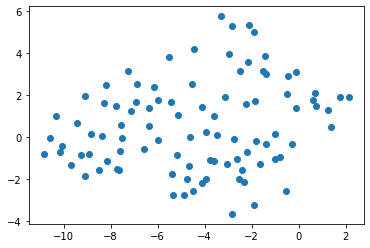

In [61]:
# Visualize the clusters
plt.scatter(X['x'], X['y'])
plt.show()

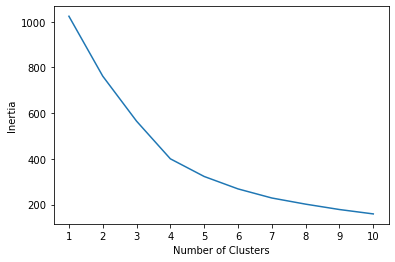

In [62]:
# plot the elbow to evaluate where the k is
plt.plot(df_elbow["k"], df_elbow["inertia"])
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")
plt.show()

In [63]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=3, random_state=0)

# Fit the model
model.fit(pcs_df)

# Predict clusters
predictions = model.predict(pcs_df)

# Add the predicted class column to the dataframe
pcs_df["class"] = model.labels_
pcs_df.head()

,PC 1,PC 2,PC 3,class
0,1.126021,5.397145,3.093885,2
1,-0.832357,4.589243,3.753001,2
2,-1.517963,0.774094,-0.362373,0
3,-1.172346,0.437467,-1.351160,0
4,-2.640188,0.088715,-0.475882,0


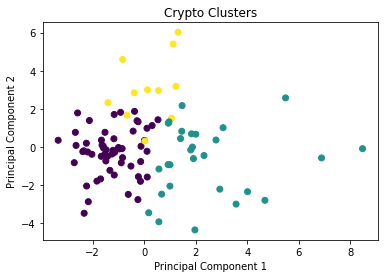

In [64]:
# Visualize the clusters
plt.scatter(x=pcs_df['PC 1'], y=pcs_df['PC 2'], c=pcs_df['class'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Crypto Clusters')
plt.show()